In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
label = LabelEncoder()

In [6]:
df.Gender = label.fit_transform(df['Gender'])

In [7]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [8]:
x = df.drop('Weight',axis=1)
y = df['Weight']

In [9]:
# split train and test data
from sklearn.model_selection import train_test_split

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=.70)

In [11]:
from sklearn.neighbors import KNeighborsRegressor

In [12]:
knn_reg = KNeighborsRegressor()

In [13]:
knn_reg.fit(xtrain,ytrain)

KNeighborsRegressor()

In [14]:
knn_reg.score(xtest,ytest)

0.8779125784378923

In [15]:
pred = knn_reg.predict(xtest)

# Mean squared error

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
mse = mean_squared_error(ytest,pred)

In [18]:
mse

130.01516301095188

In [19]:
import math

In [20]:
rmse = math.sqrt(mse)

In [21]:
rmse

11.402419173620652

# Linear Regression

In [22]:
#Linear Regression
from sklearn.linear_model import LinearRegression

In [23]:
reg = LinearRegression()

In [24]:
reg.fit(xtrain,ytrain) #training your ml model

LinearRegression()

In [25]:
reg.score(xtest,ytest)

0.8994876010971853

In [26]:
pred2 = reg.predict(xtest)
mse2 = mean_squared_error(ytest,pred2)
mse2

107.03916718663211

In [27]:
rmse2 = math.sqrt(mse2)

In [28]:
rmse2

10.345973476992492

# Hyper Parameter Optimization

# Randomized Search CV

In [29]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

In [30]:
n_neighbors = np.random.randint(1,200,20)

# Create ids
grids = {'n_neighbors': n_neighbors
        }

In [31]:
knn_reg2 = KNeighborsRegressor()

In [32]:
rmcv = RandomizedSearchCV(knn_reg2, grids, n_iter=200, cv=5)

In [33]:
rmcv.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 20 is smaller than n_iter=200. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=200,
                   param_distributions={'n_neighbors': array([ 52,  26,   6, 124, 113, 149, 127, 176, 142, 162,  55, 109, 110,
       160, 133, 175,   2,  67, 137, 103])})

In [34]:
#rmcv.cv_results_

In [35]:
results = pd.DataFrame(rmcv.cv_results_)
#results

In [36]:
rmcv.best_params_

{'n_neighbors': 52}

In [37]:
rmcv.best_estimator_

KNeighborsRegressor(n_neighbors=52)

In [38]:
rmcv.best_score_

0.8970429572530874

In [39]:
best = rmcv.best_estimator_

In [40]:
best.score(xtest,ytest) #best = KNeighborsRegressor(n_neighbors=55)

0.895471907119868

# Use GridSearchCV

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
gscv = GridSearchCV(knn_reg2, grids, cv=3)

In [43]:
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 52,  26,   6, 124, 113, 149, 127, 176, 142, 162,  55, 109, 110,
       160, 133, 175,   2,  67, 137, 103])})

In [44]:
gscv.cv_results_

{'mean_fit_time': array([0.00731397, 0.01041516, 0.01562158, 0.        , 0.        ,
        0.00520802, 0.01041166, 0.00753514, 0.00520643, 0.01041182,
        0.00520531, 0.01041587, 0.        , 0.01041428, 0.01041476,
        0.00520738, 0.01562166, 0.00520706, 0.01042573, 0.00520412]),
 'std_fit_time': array([5.23545360e-03, 7.36462793e-03, 2.97360213e-07, 0.00000000e+00,
        0.00000000e+00, 7.36524607e-03, 7.36215600e-03, 6.39125058e-03,
        7.36299824e-03, 7.36226823e-03, 7.36142476e-03, 7.36513405e-03,
        0.00000000e+00, 7.36400977e-03, 7.36434695e-03, 7.36434694e-03,
        3.89335909e-07, 7.36389737e-03, 7.37211384e-03, 7.35973888e-03]),
 'mean_score_time': array([0.02672021, 0.01562063, 0.00520754, 0.06248514, 0.05727808,
        0.06248418, 0.05725423, 0.07461866, 0.05727935, 0.06769482,
        0.0260373 , 0.047369  , 0.0520703 , 0.06248466, 0.05727768,
        0.06769212, 0.        , 0.0260361 , 0.05726918, 0.04686395]),
 'std_score_time': array([6.87635261e-

In [45]:
result2 = pd.DataFrame(gscv.cv_results_)
result2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007314,5.235454e-03,0.026720,6.876353e-03,52,{'n_neighbors': 52},0.893965,0.900123,0.893469,0.895852,0.003026,1
1,0.010415,7.364628e-03,0.015621,4.089572e-06,26,{'n_neighbors': 26},0.893112,0.900376,0.892793,0.895427,0.003502,3
2,0.015622,2.973602e-07,0.005208,7.364572e-03,6,{'n_neighbors': 6},0.877948,0.887421,0.881747,0.882372,0.003893,19
3,0.000000,0.000000e+00,0.062485,5.371331e-06,124,{'n_neighbors': 124},0.891587,0.894532,0.890817,0.892312,0.001601,9
4,0.000000,0.000000e+00,0.057278,7.362998e-03,113,{'n_neighbors': 113},0.892086,0.895237,0.891315,0.892879,0.001697,8
5,0.005208,7.365246e-03,0.062484,8.991328e-07,149,{'n_neighbors': 149},0.890070,0.892674,0.889506,0.890750,0.001380,14
6,0.010412,7.362156e-03,0.057254,7.347741e-03,127,{'n_neighbors': 127},0.891432,0.894441,0.890635,0.892169,0.001639,10
7,0.007535,6.391251e-03,0.074619,4.097686e-03,176,{'n_neighbors': 176},0.888595,0.890715,0.887825,0.889045,0.001222,18
8,0.005206,7.362998e-03,0.057279,7.364066e-03,142,{'n_neighbors': 142},0.890434,0.893113,0.889998,0.891182,0.001378,13
9,0.010412,7.362268e-03,0.067695,7.361762e-03,162,{'n_neighbors': 162},0.889347,0.891766,0.888706,0.889940,0.001318,16


In [46]:
gscv.best_score_

0.8958521632117539

In [47]:
gscv.best_estimator_

KNeighborsRegressor(n_neighbors=52)

In [48]:
best2 = gscv.best_estimator_
best2.score(xtest,ytest)

0.895471907119868

In [84]:
gscv.best_estimator_

KNeighborsRegressor(n_neighbors=52)

# KNN Classifier with Python

In [49]:
df = pd.read_csv('weight-height.csv')

In [50]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

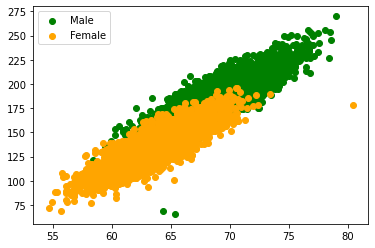

In [52]:
df0 = df[ df.Gender=='Male']
df1 = df[ df.Gender=='Female']

plt.scatter(df0['Height'],df0['Weight'],color='green',label='Male')
plt.scatter(df1['Height'],df1['Weight'],color='orange',label='Female')

plt.legend()

In [53]:
df['Gender'] = df.Gender.replace({'Male':0,'Female':1})

In [54]:
x = df.drop(['Gender'], axis=1)

In [55]:
y = df.Gender

In [56]:
x.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [57]:
# split train and test data
from sklearn.model_selection import train_test_split

In [58]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=.70)

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn2 = KNeighborsClassifier()

In [61]:
knn2.fit(xtrain,ytrain)

KNeighborsClassifier()

In [62]:
knn2.score(xtest,ytest)

0.9092325671990651

In [63]:
knn2.predict(xtest)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [64]:
xtest.head()

,Height,Weight
4705,71.528424,192.072947
2722,73.504268,205.473091
7715,64.922011,126.697343
4827,65.673643,170.062794
5062,64.936556,152.419352


# Save Training Model

In [65]:
import joblib as jbl
jbl.dump(knn2,'My2')

['My2']

In [66]:
model2 = jbl.load('My2')

In [67]:
model2.predict([[71,242]])

array([0], dtype=int64)

# Tuning

In [68]:
knn3 = KNeighborsClassifier()

# Randomized Search CV

In [69]:
rs2 = RandomizedSearchCV(knn3, grids, n_iter=200, cv=5)

In [70]:
rs2.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 20 is smaller than n_iter=200. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=200,
                   param_distributions={'n_neighbors': array([ 52,  26,   6, 124, 113, 149, 127, 176, 142, 162,  55, 109, 110,
       160, 133, 175,   2,  67, 137, 103])})

In [71]:
rs2.cv_results_

{'mean_fit_time': array([0.0073122 , 0.00624161, 0.00937667, 0.01018834, 0.00937295,
        0.00936551, 0.00624981, 0.00625076, 0.00860243, 0.        ,
        0.00625544, 0.01243095, 0.01249652, 0.01376019, 0.01063714,
        0.00691419, 0.00312409, 0.00937324, 0.01156678, 0.00711336]),
 'std_fit_time': array([0.00633093, 0.00764438, 0.00765602, 0.00678979, 0.00765298,
        0.00764692, 0.00765442, 0.00765559, 0.00551391, 0.        ,
        0.00766132, 0.00263013, 0.00624826, 0.00227818, 0.00571078,
        0.00608405, 0.00624819, 0.00765321, 0.00605762, 0.00619548]),
 'mean_score_time': array([0.06717143, 0.04999566, 0.04373527, 0.0836688 , 0.07498183,
        0.08123822, 0.08123703, 0.09972143, 0.08809471, 0.09231119,
        0.07185082, 0.09698706, 0.10397038, 0.12500553, 0.11643124,
        0.12624516, 0.05936098, 0.08435445, 0.11744342, 0.10120702]),
 'std_score_time': array([0.01337512, 0.00626373, 0.00626231, 0.00975313, 0.00624974,
        0.01169851, 0.01169794, 0.020723

In [72]:
results = pd.DataFrame(rs2.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007312,0.006331,0.067171,0.013375,52,{'n_neighbors': 52},0.917362,0.920701,0.915693,0.908104,0.921470,0.916666,0.004777,1
1,0.006242,0.007644,0.049996,0.006264,26,{'n_neighbors': 26},0.918197,0.911519,0.917362,0.915622,0.918964,0.916333,0.002651,2
2,0.009377,0.007656,0.043735,0.006262,6,{'n_neighbors': 6},0.904841,0.905676,0.911519,0.905597,0.906433,0.906813,0.002406,19
3,0.010188,0.006790,0.083669,0.009753,124,{'n_neighbors': 124},0.918197,0.915693,0.910684,0.903926,0.920635,0.913827,0.005947,11
4,0.009373,0.007653,0.074982,0.006250,113,{'n_neighbors': 113},0.919866,0.917362,0.911519,0.904762,0.920635,0.914829,0.005963,8
5,0.009366,0.007647,0.081238,0.011699,149,{'n_neighbors': 149},0.917362,0.915693,0.912354,0.904762,0.918129,0.913660,0.004872,13
6,0.006250,0.007654,0.081237,0.011698,127,{'n_neighbors': 127},0.919032,0.919032,0.911519,0.903926,0.921470,0.914996,0.006467,7
7,0.006251,0.007656,0.099721,0.020724,176,{'n_neighbors': 176},0.915693,0.912354,0.911519,0.904762,0.917293,0.912324,0.004333,16
8,0.008602,0.005514,0.088095,0.016464,142,{'n_neighbors': 142},0.918197,0.917362,0.911519,0.903926,0.918129,0.913827,0.005540,12
9,0.000000,0.000000,0.092311,0.006388,162,{'n_neighbors': 162},0.916528,0.913189,0.910684,0.903091,0.916458,0.911990,0.004957,17


In [73]:
rs2.best_params_

{'n_neighbors': 52}

In [74]:
rs2.best_estimator_

KNeighborsClassifier(n_neighbors=52)

In [75]:
knn4 = rs2.best_estimator_

In [76]:
knn4.score(xtest,ytest)

0.9131281651733542

# Save Model for Linear Regression

In [77]:
import joblib as jbl
jbl.dump(reg,'My3')

['My3']

In [78]:
model3 = jbl.load('My3')

In [79]:
model3.predict([[1,70]])

array([192.78714492])